In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
# To load the dataset.
df = pd.read_csv("UK_Accident.csv")
# To get the basic inforation about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [5]:
l = LabelEncoder()
rt=l.fit_transform(df["Road_Type"])
jc=l.fit_transform(df["Junction_Control"])
lc=l.fit_transform(df["Light_Conditions"])
wc=l.fit_transform(df["Weather_Conditions"])
rsc=l.fit_transform(df["Road_Surface_Conditions"])
scs=l.fit_transform(df["Special_Conditions_at_Site"])
pchc=l.fit_transform(df["Pedestrian_Crossing-Human_Control"])
pcpf=l.fit_transform(df["Pedestrian_Crossing-Physical_Facilities"])    
ch=l.fit_transform(df["Carriageway_Hazards"])
ti=l.fit_transform(df["Time"])
da=l.fit_transform(df["Date"])
lah=l.fit_transform(df["Local_Authority_(Highway)"])
lsoa=l.fit_transform(df["LSOA_of_Accident_Location"])
po=l.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])

In [6]:
df["Road_Type"] = rt
df["Junction_Control"] = jc
df["Light_Conditions"] = lc
df["Weather_Conditions"] = wc
df["Road_Surface_Conditions"] = rsc
df["Special_Conditions_at_Site"] = scs
df["Pedestrian_Crossing-Human_Control"] = pchc
df["Pedestrian_Crossing-Physical_Facilities"] = pcpf
df["Carriageway_Hazards"] = ch
df["Time"] = ti
df["Date"] = da
df["Local_Authority_(Highway)"] = lah
df["LSOA_of_Accident_Location"] = lsoa
df["Did_Police_Officer_Attend_Scene_of_Accident"] = po

In [7]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,4,4,5,5,3,3,1,1,2839,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,3,2,1,0,3,3,1,1,2899,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,2,2,1,0,3,3,1,1,2847,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,2,4,1,0,3,3,1,1,2830,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,455903,201463DP40114,314240.0,293390.0,-3.265712,52.531575,63,3,1,3,...,2,0,5,5,3,3,2,1,33981,2014
1495357,455904,201463DP40214,313050.0,291200.0,-3.282677,52.511702,63,3,1,2,...,2,0,1,0,3,3,2,1,33980,2014
1495358,455905,201463DP40314,315230.0,326460.0,-3.259644,52.828952,63,3,2,1,...,2,0,5,5,3,3,2,1,35404,2014
1495359,455906,201463DP40414,303140.0,228320.0,-3.410628,51.944879,63,3,2,1,...,2,2,8,5,3,3,2,0,33989,2014


In [8]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("Accident_Index",axis=1)
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,324,3,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,432,4,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,540,5,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,648,6,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,972,2,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,3,1,3,98,7,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,3,1,2,962,1,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,3,2,1,971,3,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,3,2,1,2267,1,...,2,2,8,5,3,3,2,0,33989,2014


In [9]:
df.dropna()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,324,3,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,432,4,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,540,5,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,648,6,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,972,2,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,3,1,3,98,7,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,3,1,2,962,1,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,3,2,1,971,3,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,3,2,1,2267,1,...,2,2,8,5,3,3,2,0,33989,2014


In [10]:
df['Accident_Severity'] = df['Accident_Severity'].replace([1,2,3], [2,1,0])

In [11]:
x = df.iloc[:,df.columns != 'Accident_Severity']
y = df.iloc[:,df.columns == 'Accident_Severity']

In [12]:
x

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,1,1,324,3,1061,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,1,1,432,4,1055,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,2,1,540,5,14,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,1,1,648,6,634,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,1,1,972,2,1272,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,1,3,98,7,1244,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,1,2,962,1,1133,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,2,1,971,3,1194,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,2,1,2267,1,1119,...,2,2,8,5,3,3,2,0,33989,2014


In [13]:
y

,Accident_Severity
0,1
1,0
2,0
3,0
4,0
...,...
1495356,0
1495357,0
1495358,0
1495359,0


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [15]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [16]:
y_pred = model.predict(x_test)
print('Accuracy  of Random Forest:',accuracy_score(y_test, y_pred))

Accuracy  of Random Forest: 0.8584088548196439


In [17]:
from sklearn.metrics import roc_auc_score

print('Classification Report of RandomForestClassifier:')
print(classification_report(y_test, y_pred))

Classification Report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    357668
           1       0.77      0.04      0.07     55924
           2       0.95      0.03      0.07      5163

    accuracy                           0.86    418755
   macro avg       0.86      0.36      0.35    418755
weighted avg       0.85      0.86      0.80    418755



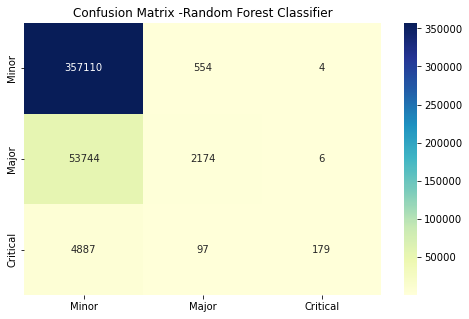

In [18]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -Random Forest Classifier")
plt.show()

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
model = LogisticRegression(random_state=0).fit(x, y)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred = model.predict(x_test)
print('Accuracy  of Logistic Regression:',accuracy_score(y_test, y_pred))

Accuracy  of Logistic Regression: 0.8541223388377452


In [21]:
from sklearn.metrics import roc_auc_score

print('Classification Report of LogisticRegression Classifier:')
print(classification_report(y_test, y_pred))

Classification Report of LogisticRegression Classifier:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    357668
           1       0.00      0.00      0.00     55924
           2       0.00      0.00      0.00      5163

    accuracy                           0.85    418755
   macro avg       0.28      0.33      0.31    418755
weighted avg       0.73      0.85      0.79    418755



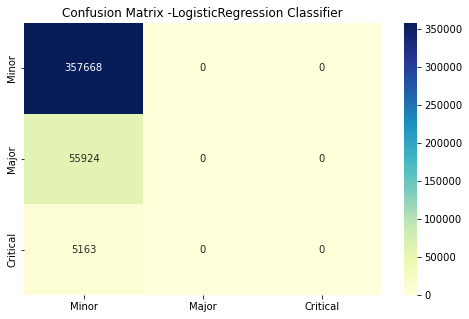

In [22]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -LogisticRegression Classifier")
plt.show()

In [23]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred = model.predict(x_test)
print('Accuracy  of Decision Tree:',accuracy_score(y_test, y_pred))

Accuracy  of Decision Tree: 0.7593485450919989


In [25]:
from sklearn.metrics import roc_auc_score

print('Classification Report of Decision Tree Classifier:')
print(classification_report(y_test, y_pred))

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86    357668
           1       0.21      0.24      0.22     55924
           2       0.07      0.08      0.07      5163

    accuracy                           0.76    418755
   macro avg       0.38      0.39      0.39    418755
weighted avg       0.77      0.76      0.77    418755



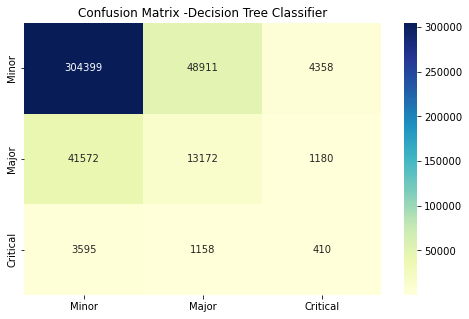

In [26]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -Decision Tree Classifier")
plt.show()

In [27]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [28]:
y_pred = model.predict(x_test)
print('Accuracy  of XGBoost:',accuracy_score(y_test, y_pred))

Accuracy  of XGBoost: 0.8543205454263233


In [31]:
from sklearn.metrics import roc_auc_score

print('Classification Report of -XGBClassifier:')
print(classification_report(y_test, y_pred))

Classification Report of -XGBClassifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    357668
           1       0.47      0.01      0.02     55924
           2       0.18      0.00      0.00      5163

    accuracy                           0.85    418755
   macro avg       0.50      0.34      0.31    418755
weighted avg       0.80      0.85      0.79    418755



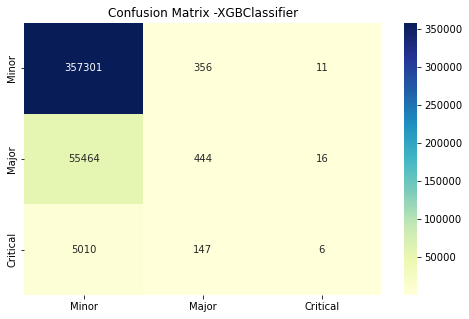

In [30]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -XGBClassifier")
plt.show()

In [32]:
TP = np.diag(cm)
TP

array([357301,    444,      6], dtype=int64)

In [34]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

array([60474,   503,    27], dtype=int64)

In [35]:
FN = cm.sum(axis=1) - np.diag(cm)
FN

array([  367, 55480,  5157], dtype=int64)

In [37]:
TN = cm.sum() - (FP + FN + TP)
TN

array([   613, 362328, 413565], dtype=int64)

In [38]:
#True Positive Rate
TPR = TP/(TP+FN)
TPR

array([0.99897391, 0.00793935, 0.00116212])

In [39]:
FPR = FP/(FP+TN)
FPR

array([9.89965132e-01, 1.38632035e-03, 6.52817269e-05])